In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as mpatches
from scipy.stats import ttest_ind, mannwhitneyu
import numpy as np
plt.rcParams["svg.fonttype"] = "none"

In [2]:
full_file = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Data/machine_learning_input_prep/naive_transcripts_with_fasta_clip_m6a_paris_intra_paris_inter_postar3_collapsed.bed', sep='\t')
full_file["sequence_length"] = full_file["sequence"].str.len()
full_file

,transcript_id,score,strand,gene_name,feature,smoops_naive,smoops_epi,smoops_diff,control_common,semi_diff_mean_tpm,...,SRSF7_postar3,TAF15_postar3,TARDBP_postar3,TTP_postar3,U2AF2_postar3,UPF1_postar3,YTHDC2_postar3,YY1_postar3,ZFP36_postar3,sequence_length
0,ENSMUST00000000080.8,.,+,Klf6,exon,False,False,False,True,23.747248,...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",4225
1,ENSMUST00000000312.12,.,+,Cdh1,exon,True,True,True,False,29.398332,...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",4430
2,ENSMUST00000000314.13,.,+,Cdh4,exon,True,False,False,False,2.057100,...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",6388
3,ENSMUST00000000543.6,.,+,Tamalin,exon,False,False,False,True,1.173358,...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",2033
4,ENSMUST00000000619.8,.,-,Clcn4,exon,False,False,False,True,1.947124,...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",4607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,ENSMUST00000239512.1,.,-,Lin54,exon,False,False,False,True,8.714442,...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",4451
1677,ENSMUST00000239552.1,.,-,Eppk1,exon,True,True,True,False,1.105965,...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [4]:
feature_length_file = pd.read_csv('/ceph/hpc/home/novljanj/data_storage/projects/smOOPS_paper/Data/masterfile_with_feature_lengths/all_smOOPS_and_controls_V2_with_feature_lengths.tsv', sep='\t')
feature_length_file = feature_length_file[["transcript_id", "cds_length",	"3utr_length",	"5utr_length"]]
full_file_with_feature_lengths = pd.merge(full_file, feature_length_file, on="transcript_id", how="left")
full_file_with_feature_lengths.sort_values(by="5utr_length", inplace=True)
full_file_with_feature_lengths

,transcript_id,score,strand,gene_name,feature,smoops_naive,smoops_epi,smoops_diff,control_common,semi_diff_mean_tpm,...,TTP_postar3,U2AF2_postar3,UPF1_postar3,YTHDC2_postar3,YY1_postar3,ZFP36_postar3,sequence_length,cds_length,3utr_length,5utr_length
1636,ENSMUST00000232180.2,.,+,Arid1b,exon,True,True,True,False,6.141669,...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",7309,6888.0,421.0,0.0
1053,ENSMUST00000125049.2,.,+,Stard7,exon,False,False,False,True,17.973917,...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",2869,1225.0,1644.0,0.0
208,ENSMUST00000027775.9,.,+,Efcab2,exon,False,False,False,True,1.414431,...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",3580,492.0,3088.0,0.0
1249,ENSMUST00000165640.8,.,-,Zfp113,exon,False,False,False,True,4.208675,...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",1320,1317.0,3.0,0.0
1559,ENSMUST00000217282.2,.,-,Gm38431,exon,True,False,False,False,2.410226,...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",4234,1462.0,2772.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,ENSMUST00000238872.2,.,+,B830012L14Rik,exon,False,False,False,True,15.881161,...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",1823,NaN,NaN,NaN
1672,ENSMUST00000239256.2,.,+,Gm53041,exon,False,False,False,True,0.495301,...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",1773,NaN,NaN,NaN
1678,ENSMUST00000240231.1,.,+,U2,exon,False,False,False,True,2443.612756,...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",191,NaN,NaN,NaN
1679,ENSMUST00020182009.1,.,-,ENSMUSG00002075524,exon,False,False,False,True,543.423180,...,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...","0,0,0,0,0,0,0,0,0,0,0

smoops_naive: 449 data points
control_common: 1232 data points
smoops_naive vs control_common: p-value = 0.000


/tmp/ipykernel_3672599/951279263.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y=column, data=melted_data, palette=white_palette, inner=None, gap=0.3, zorder=0)
/tmp/ipykernel_3672599/951279263.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Condition', y=column, data=melted_data, palette=hex_palette, showfliers=False, width=0.15, whis=0, zorder=2)
/tmp/ipykernel_3672599/951279263.py:54: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['control', 'naive smOOPS', 'epi smOOPS', 'diff smOOPS'])


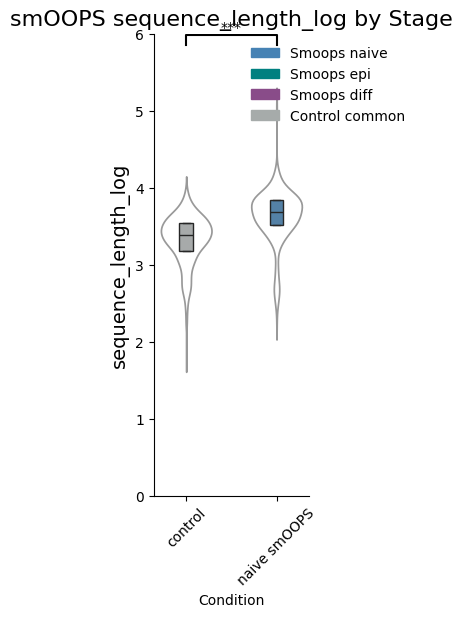

/tmp/ipykernel_3672599/951279263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{column}_log"] = np.log10(df[column] + 1)
/tmp/ipykernel_3672599/951279263.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y=column, data=melted_data, palette=white_palette, inner=None, gap=0.3, zorder=0)
/tmp/ipykernel_3672599/951279263.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Condition', y=column, data=melted_data, pa

smoops_naive: 352 data points
control_common: 956 data points
smoops_naive vs control_common: p-value = 0.000


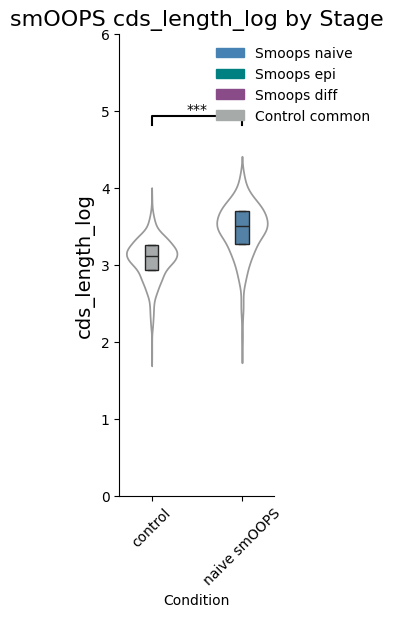

/tmp/ipykernel_3672599/951279263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{column}_log"] = np.log10(df[column] + 1)
/tmp/ipykernel_3672599/951279263.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y=column, data=melted_data, palette=white_palette, inner=None, gap=0.3, zorder=0)
/tmp/ipykernel_3672599/951279263.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Condition', y=column, data=melted_data, pa

smoops_naive: 352 data points
control_common: 956 data points
smoops_naive vs control_common: p-value = 0.000


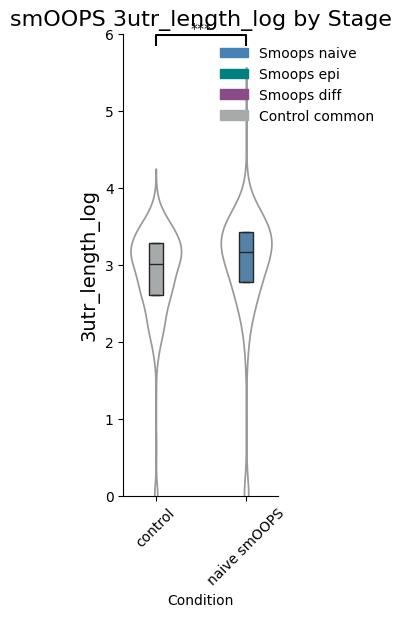

/tmp/ipykernel_3672599/951279263.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{column}_log"] = np.log10(df[column] + 1)
/tmp/ipykernel_3672599/951279263.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Condition', y=column, data=melted_data, palette=white_palette, inner=None, gap=0.3, zorder=0)
/tmp/ipykernel_3672599/951279263.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Condition', y=column, data=melted_data, pa

smoops_naive: 352 data points
control_common: 956 data points
smoops_naive vs control_common: p-value = 0.002


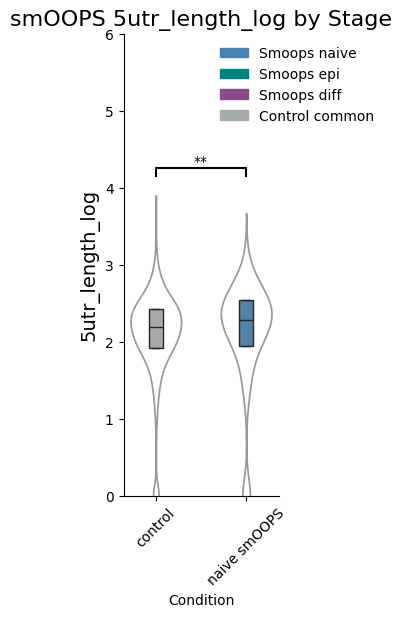

In [33]:
def plot_boxplot(df, column, log=False):
    if log:
        df[f"{column}_log"] = np.log10(df[column] + 1)
        column = f"{column}_log"

    conditions = ['control_common', 'smoops_naive',]
    filtered_data = pd.DataFrame({
        condition: df[df[condition] == True][column] for condition in conditions
    })

    melted_data = filtered_data.melt(var_name='Condition', value_name=column)
        
    comparisons = [('smoops_naive', 'control_common')]
    results = []
    for test_a, test_b in comparisons:
        test_a_data = filtered_data[test_a].dropna().to_list()
        test_b_data = filtered_data[test_b].dropna().to_list()
        print(f'{test_a}: {len(test_a_data)} data points')
        print(f'{test_b}: {len(test_b_data)} data points')
        stat, p_val = ttest_ind(test_a_data, test_b_data, equal_var=False)
        # stat, p_val = mannwhitneyu(test_a_data, test_b_data, alternative='two-sided')
        results.append((test_a, test_b, p_val))
        print(f'{test_a} vs {test_b}: p-value = {p_val:.3f}')
        
    hex_palette = {'smoops_naive': '#4682B4', 'smoops_epi': '#008080', 'smoops_diff': '#894c89', 'control_common': '#A6ABAA'}
    white_palette = {key: '#FFFFFF' for key in hex_palette.keys()} 

    plt.figure(figsize=(2, 6))

    sns.violinplot(x='Condition', y=column, data=melted_data, palette=white_palette, inner=None, gap=0.3, zorder=0)

    ax = sns.boxplot(x='Condition', y=column, data=melted_data, palette=hex_palette, showfliers=False, width=0.15, whis=0, zorder=2)    
    
    y_max = melted_data[column].max() * 1.15
    y_step = y_max / 11

    for idx, (test_a, test_b, p_val) in enumerate(results):
        x1, x2 = conditions.index(test_a), conditions.index(test_b)
        y, h = y_max + idx * y_step, y_step / 4
        ax.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.5, c='black')
        significance = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*" if p_val < 0.05 else "ns"
        ax.text((x1 + x2) * 0.5, y + h, significance, ha='center', va='bottom', color='black')
    
    plt.title(f'smOOPS {column} by Stage', fontsize=16)
    plt.ylabel(f'{column}', fontsize=14)
    plt.xticks(rotation=45)

    ax.set_xticklabels(['control', 'naive smOOPS', 'epi smOOPS', 'diff smOOPS'])

    plt.ylim(0, 6)

    legend_elements = [mpatches.Patch(color=hex_palette[name], label=name.replace('_', ' ').capitalize()) for name in hex_palette]
    plt.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.7, 1), frameon=False)

    sns.despine()
    
    plt.show()
    
plot_boxplot(full_file, 'sequence_length', log=True)

full_file_has_feature_lengths = full_file_with_feature_lengths[(full_file_with_feature_lengths["cds_length"] >=0) & (full_file_with_feature_lengths["3utr_length"] >=0) & (full_file_with_feature_lengths["5utr_length"] >=0)]
plot_boxplot(full_file_has_feature_lengths, 'cds_length', log=True)
plot_boxplot(full_file_has_feature_lengths, '3utr_length', log=True)
plot_boxplot(full_file_has_feature_lengths, '5utr_length', log=True)
